# Lab 4 Neural Networks
* Nicholas Larsen
* Steven Larsen

In this lab we will explore different kinds of Neural Networks starting with a simple 2 layer Perceptron and ending up with a 5 Layer Perceptron with different kinds of preprocessing and 2 different adaptive learning techniques.

The dataset description can be found here:https://www.kaggle.com/muonneutrino/us-census-demographic-data/data

# Load Split and Balance

## Load into Pandas

In [1]:
import numpy as np
import pandas as pd
import missingno as mn
from sklearn.datasets import load_digits



ds = load_digits()
X_nums = ds.data/16.0-0.5 # normalize the input, very important
y_nums = ds.target

df = pd.read_csv('./../acs2017_census_tract_data.csv')
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


<AxesSubplot:>

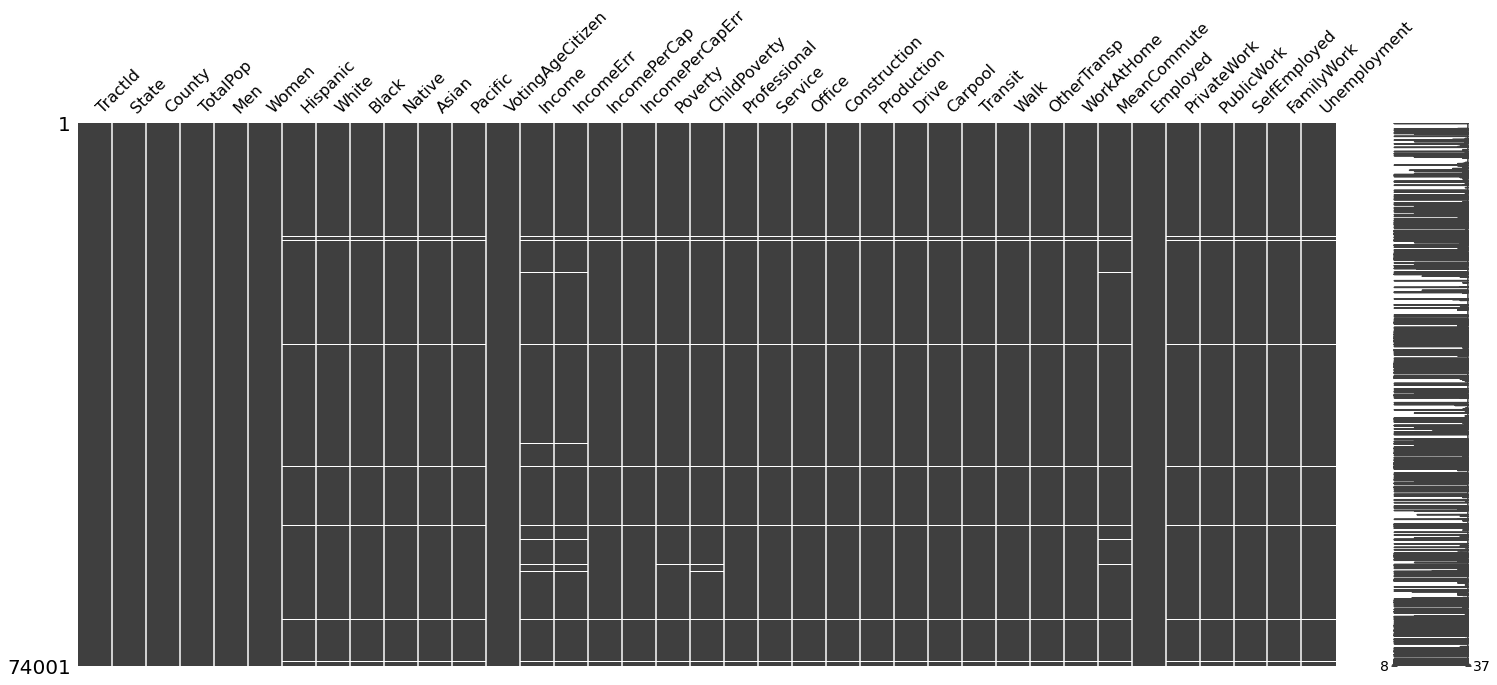

In [2]:
mn.matrix(df)

<AxesSubplot:>

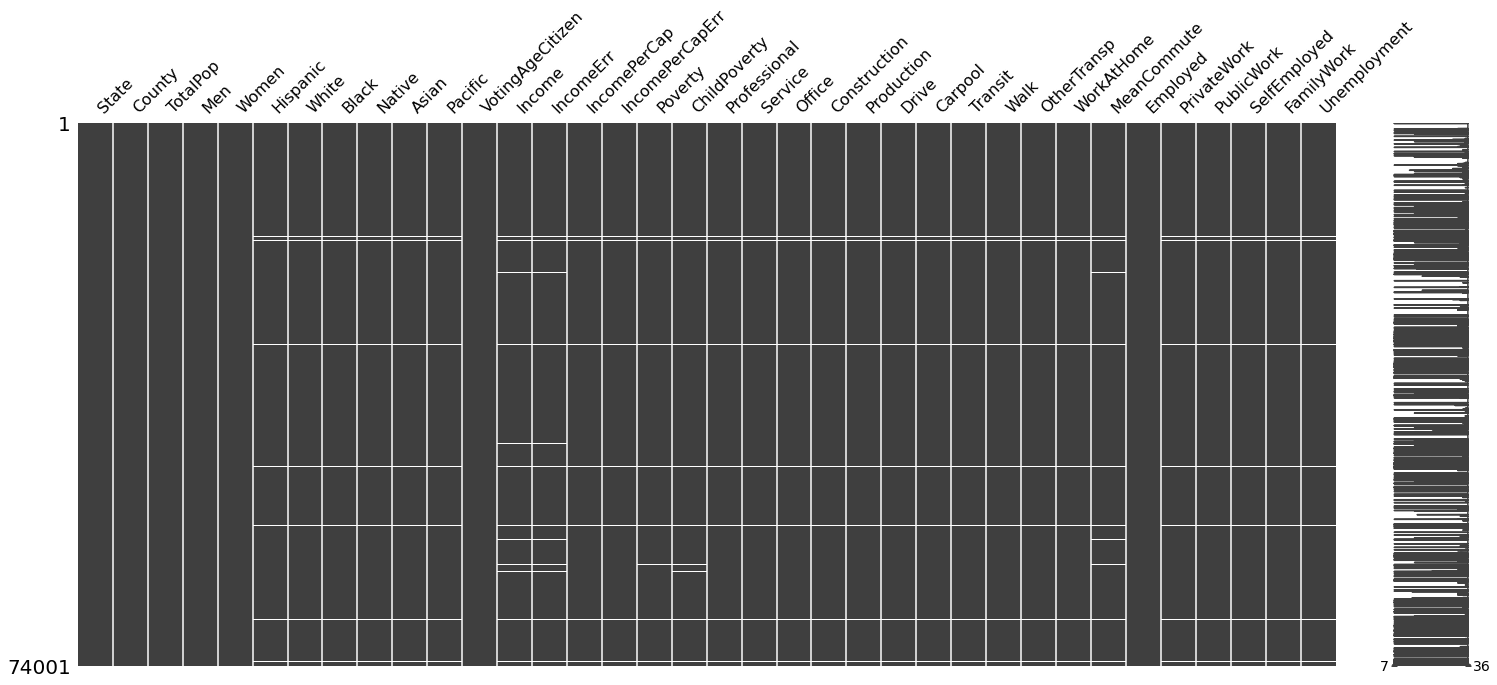

In [3]:
df = df.drop(columns='TractId')
mn.matrix(df)

<AxesSubplot:>

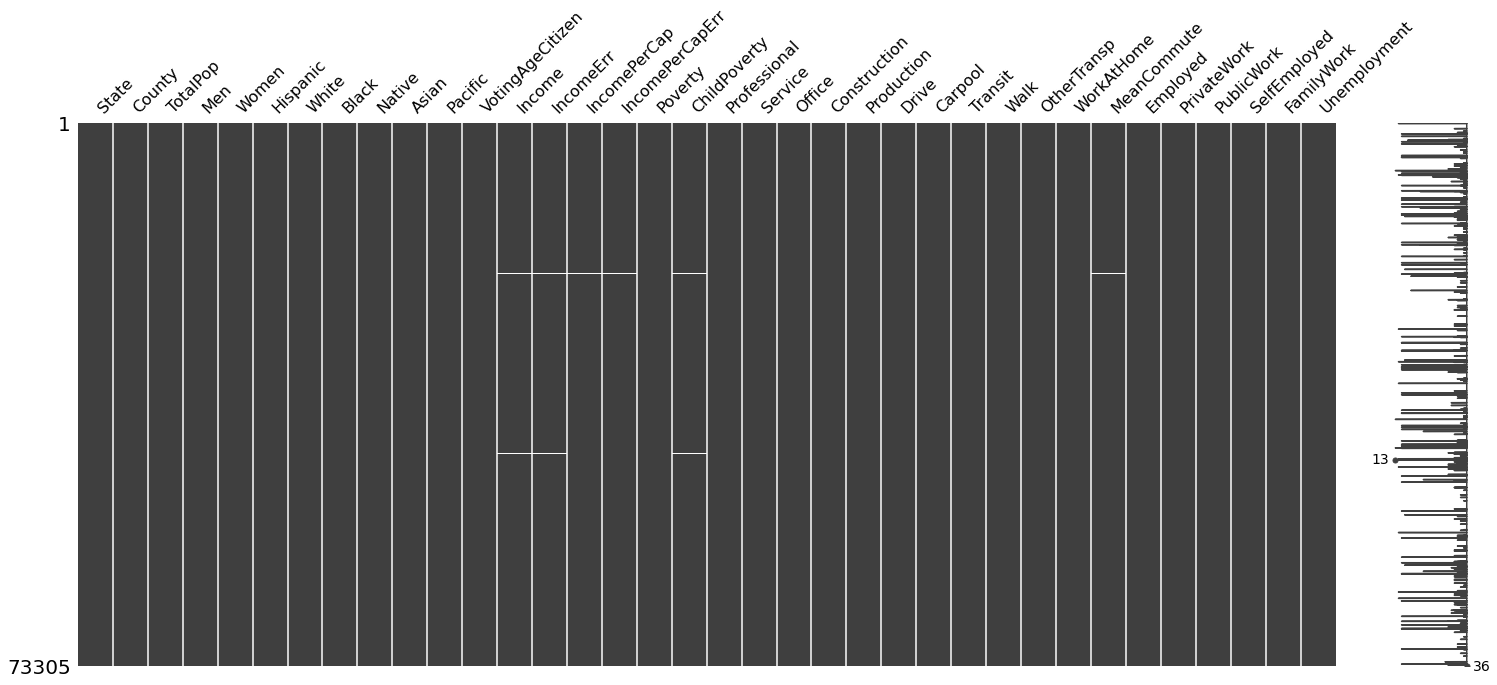

In [4]:
from numpy import nan
df = df[df.Hispanic.notnull()]
mn.matrix(df)

<AxesSubplot:>

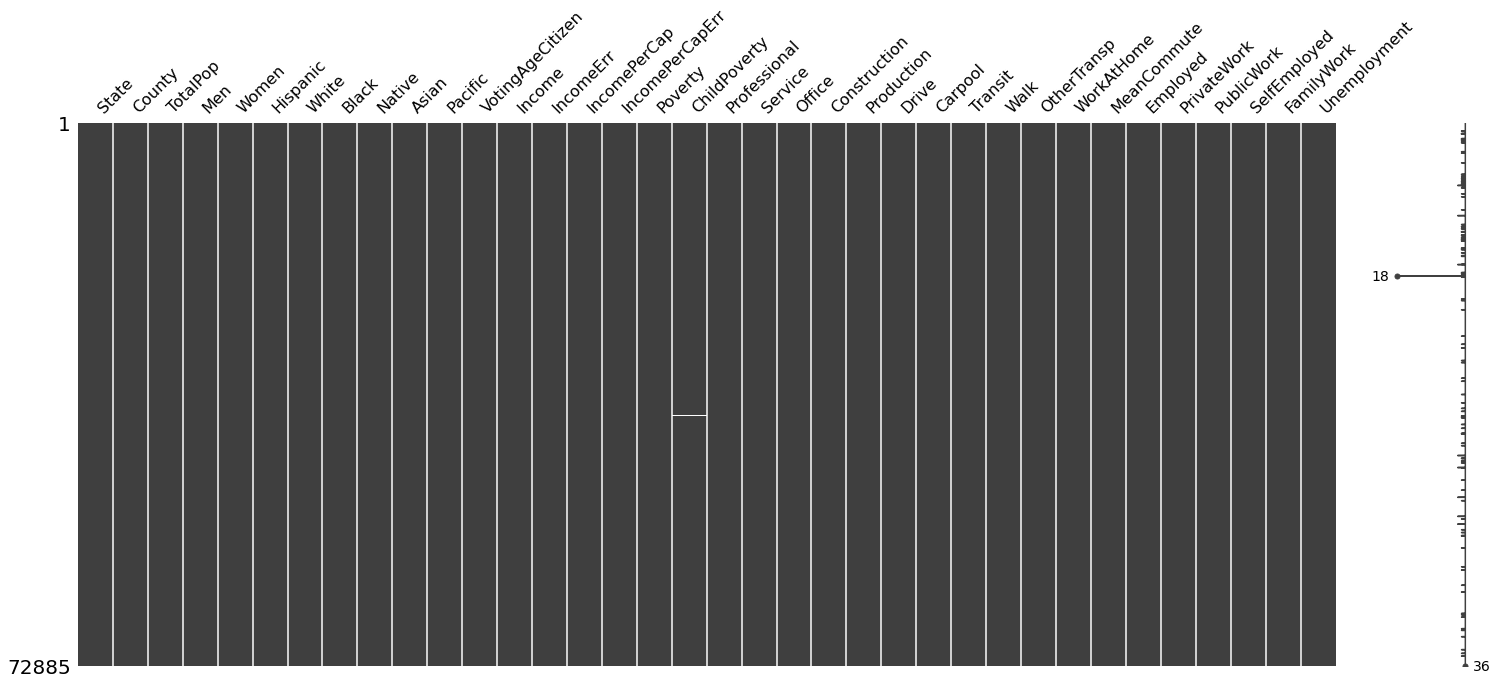

In [5]:
df = df[df.Income.notnull()]
mn.matrix(df)

<AxesSubplot:>

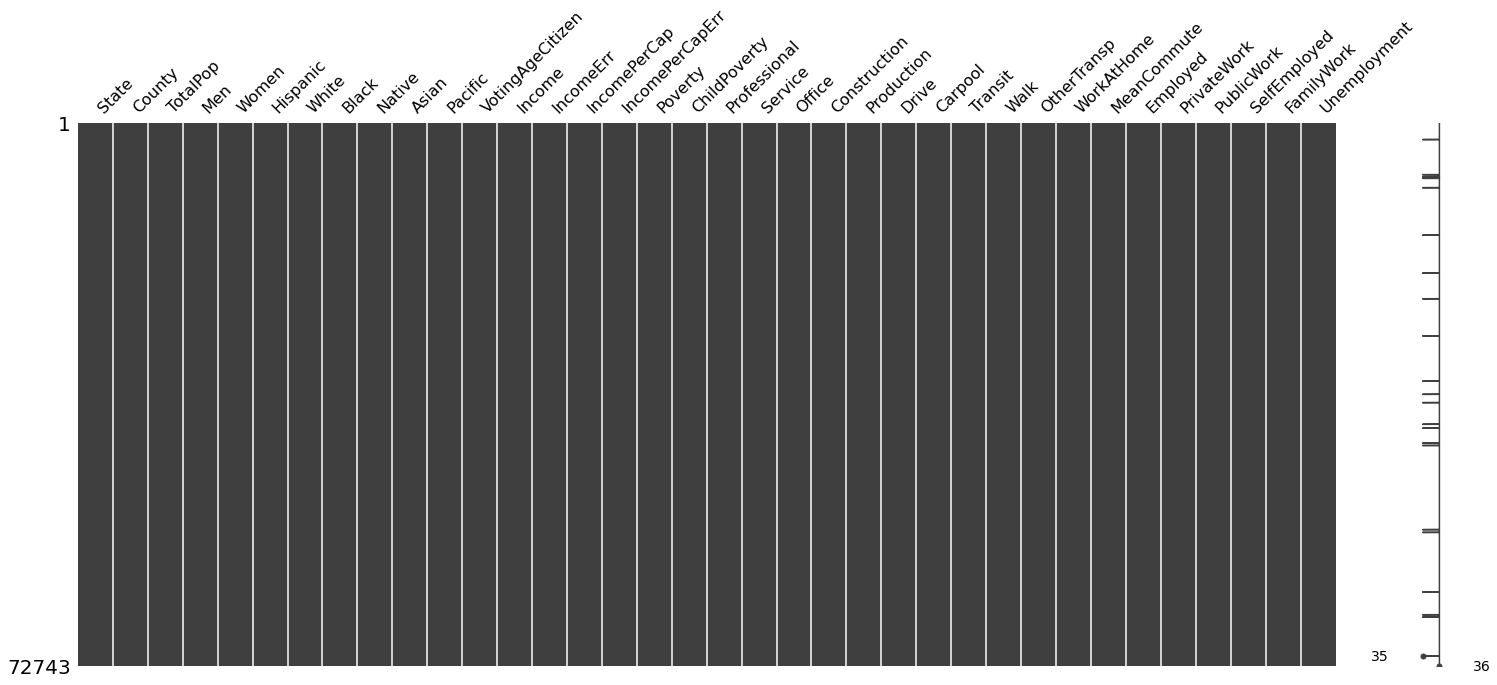

In [6]:
df = df[df.ChildPoverty.notnull()]
mn.matrix(df)

<AxesSubplot:>

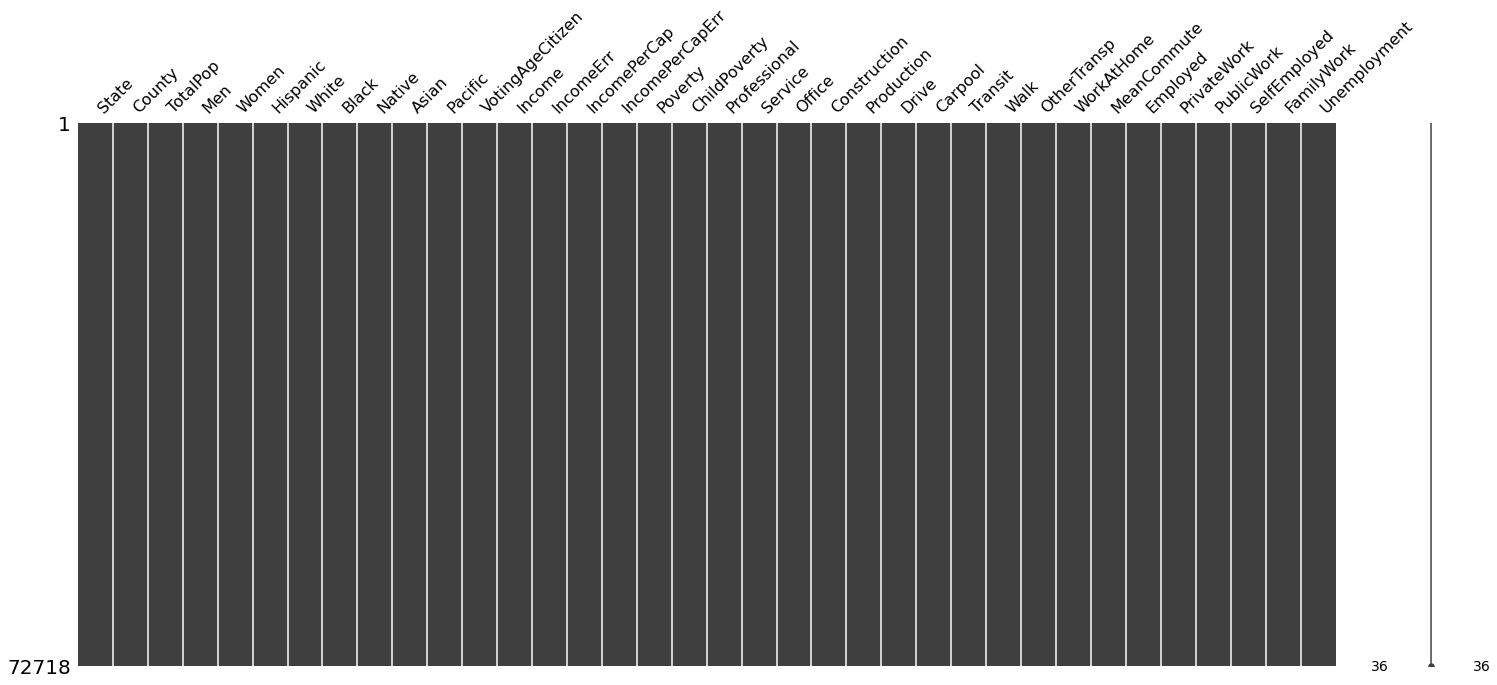

In [7]:
df = df[df.MeanCommute.notnull()]
mn.matrix(df)

In [8]:
df['ChildPoverty'].describe()

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

In [9]:
labels = ['low', 'med-low', 'med-high', 'high']
df['child_poverty_class'] = pd.qcut(df['ChildPoverty'],
                             q=4,
                             labels=labels)
df['child_poverty_class'].describe()

count     72718
unique        4
top         low
freq      18229
Name: child_poverty_class, dtype: object

In [10]:
df['child_poverty_class'].value_counts()

low         18229
med-low     18171
high        18170
med-high    18148
Name: child_poverty_class, dtype: int64

<AxesSubplot:>

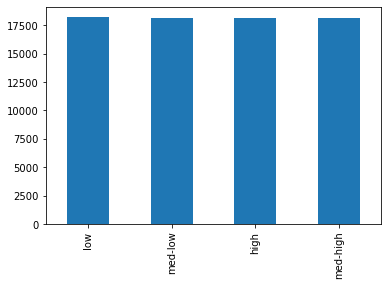

In [11]:
df['child_poverty_class'].value_counts().plot(kind='bar')

## Split the data

Size of X Train 58174
Size of X Test 14544
Size of y Train 58174
Size of y Test 14544


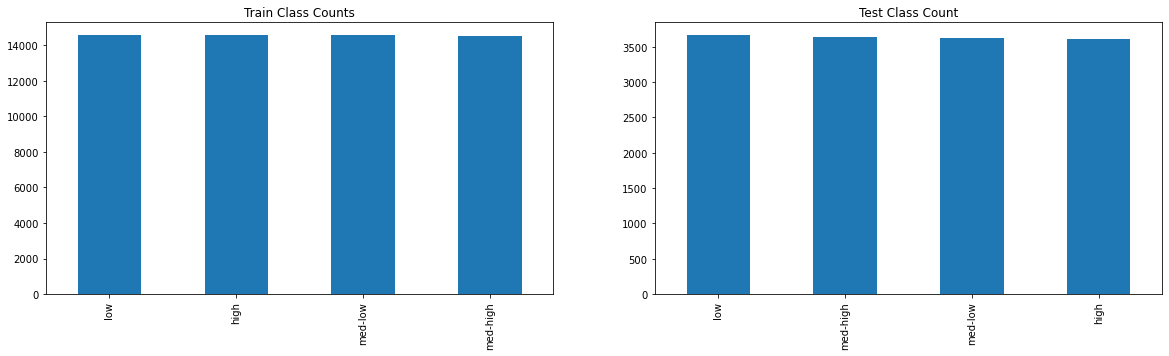

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_y = df['child_poverty_class']

X_train_df, X_test_df, y_train_df, y_test_df = \
    train_test_split(df, df_y, test_size=0.2)
print('Size of X Train', len(X_train_df))
print('Size of X Test', len(X_test_df))
print('Size of y Train', len(y_train_df))
print('Size of y Test', len(y_test_df))

fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
X_train_df['child_poverty_class'].value_counts().plot(kind='bar')
plt.title('Train Class Counts')
plt.subplot(1,2,2)
X_test_df['child_poverty_class'].value_counts().plot(kind='bar')
plt.title('Test Class Count')

X_train_df = X_train_df.drop(columns=['child_poverty_class','ChildPoverty'])

X_test_df = X_test_df.drop(columns=['child_poverty_class','ChildPoverty'])

Balancing of the data needs to be done on both training and test because we are assuming the data used to train the model is representative of the real world example that it will be used for. If the test data was distributed differently then we might not be able to train the model effectively.  It might also be useful to have independant training sets so that the different models can be statistically compared more accurately.

# Pre-processing

## 2 Layer Perceptron 

In [13]:
#Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#Original Author: Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1,random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.minibatches = minibatches
        self.shuffle = shuffle
        
    def get_params(self,deep):
        return {'n_hidden': self.n_hidden,
            'C':self.l2_C,
            'epochs' :self.epochs,
            'eta':self.eta,
            'alpha':self.alpha,
            'decrease_const':self.decrease_const,
            'minibatches':self.minibatches,
            'shuffle':self.shuffle
        }
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    

In [14]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        
        #print( grad1, grad2)
        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                delta_W1, delta_W2 = self.eta * grad1, self.eta * grad2
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev))
                delta_W1_prev, delta_W2_prev = delta_W1, delta_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

In [15]:
code_classes = {"child_poverty_class": {'low':0, 'med-low':1, 'med-high':2, 'high':3}}
X_train_base = X_train_df.drop(columns=['State','County']).to_numpy()
y_train_base = y_train_df.to_frame().replace(code_classes).to_numpy().ravel()

X_test_base = X_test_df.drop(columns=['State','County']).to_numpy()
y_test_base = y_test_df.to_frame().replace(code_classes).to_numpy().ravel()

print(X_train_base.shape)
print(X_test_base.shape)
print(X_test_base.shape)
print(y_test_base.shape)

(58174, 33)
(14544, 33)
(14544, 33)
(14544,)


In [16]:
def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [17]:
%%time 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

params = { 'n_hidden':100, 
         'C':0.1, 'epochs':400, 'eta':0.001, 
         'alpha':0.01, 'decrease_const':1e-5, 'minibatches':100,
         'shuffle':True,'random_state':1}



nn_base = TwoLayerPerceptron(**params)
nn_base.fit(X_train_base, y_train_base, print_progress=1,XY_test=(X_test_base,y_test_base))
yhat = nn_base.predict(X_test_base)
print('Test acc:',accuracy_score(y_test_base,yhat))

Epoch: 400/400

Test acc: 0.2519939493949395
Wall time: 5min 37s


0 3
0 3
0 3
Loss :
Resubstitution acc: 0.2504039605321965
Validation acc: 0.2519939493949395


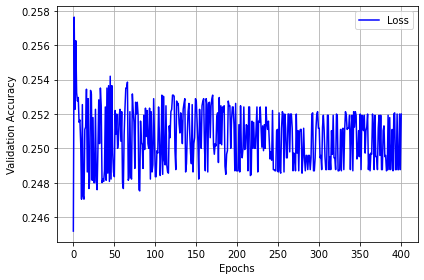

In [57]:
print(min(y_test_base),max(y_test_base))
print(min(yhat),max(yhat))
print(min(y_train_base),max(y_train_base))

print_result(nn_base,X_train_base,y_train_base,X_test_base,y_test_base,title="Loss",color="blue")

plt.show()

This perceptron does not appear to train well. We can see that it does attempt to assign all three values to different samples, even though it does not do better than guesing.  Moving on to the normailzed and one hot encoded perceptrons might be more fruitful.

## 2 Layer Perceptron with Normalize 

In [19]:
from sklearn.preprocessing import normalize
X_train = X_train_df.drop(columns=['State','County'])
X_test = X_test_df.drop(columns=['State','County'])
X_train_df_norm = X_train.copy()
X_test_df_norm = X_test.copy()

# Force the sum to be 1 of all of the features
for col in X_train.columns:
    X_train_df_norm[col] = X_train[col] / np.linalg.norm(X_train[col])
    X_test_df_norm[col] = X_test[col] / np.linalg.norm(X_train[col])
X_train_df_norm.head()


code_classes = {"child_poverty_class": {'low':0, 'med-low':1, 'med-high':2, 'high':3}}
X_train_norm = X_train_df_norm.to_numpy()
y_train_norm = y_train_df.to_frame().replace(code_classes).to_numpy().ravel()
X_test_norm = X_test_df_norm.to_numpy()
y_test_norm = y_test_df.to_frame().replace(code_classes).to_numpy().ravel()


X_train_df_norm.head()
print(X_train_norm.shape)
print(y_train_norm.shape)
print(X_test_norm.shape)
print(y_test_norm.shape)

(58174, 33)
(58174,)
(14544, 33)
(14544,)


In [20]:
params = { 'n_hidden':30, 
         'C':0.1, 'epochs':400, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}


nn_norm = TwoLayerPerceptron(**params)
nn_norm.fit(X_train_norm, y_train_norm, print_progress=1,XY_test=(X_test_norm,y_test_norm))
yhat_norm = nn_norm.predict(X_test_norm)
print('Test acc:',accuracy_score(y_test_norm,yhat_norm))

Epoch: 400/400

Test acc: 0.44465071507150716


0 3
0 3
0 3
Loss :
Resubstitution acc: 0.44495822876198987
Validation acc: 0.44465071507150716


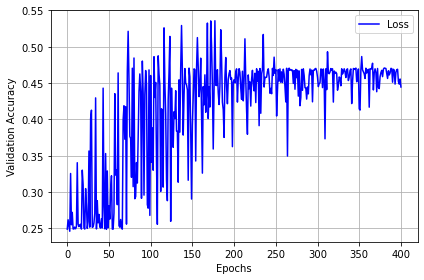

In [58]:
print(min(y_test_norm),max(y_test_norm))
print(min(yhat_norm),max(yhat_norm))
print(min(y_train_norm),max(y_train_norm))
print_result(nn_norm,X_train_norm,y_train_norm,X_test_norm,y_test_norm,title="Loss",color="blue")

plt.show()

## 2 Layer Perceptron with One-Hot Encoding and Normalized

In [22]:
print(len(X_train_df))
print(len(pd.get_dummies(X_train_df['County'], prefix='County')))

58174
58174


0
Size of X Train (58174, 2041)
Size of X Test 14544
Size of y Train 58174
Size of y Test 14544


,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,one_State_South Dakota,one_State_Tennessee,one_State_Texas,one_State_Utah,one_State_Vermont,one_State_Virginia,one_State_Washington,one_State_West Virginia,one_State_Wisconsin,one_State_Wyoming
52564,0.005469,0.005656,0.005255,0.000316,0.005482,0.000246,0.000000,0.001507,0.000000,0.005616,...,0,0,0,0,0,0,0,0,0,0
63602,0.001731,0.001663,0.001787,0.000675,0.005512,0.000606,0.000270,0.000000,0.000000,0.002159,...,0,0,1,0,0,0,0,0,0,0
35105,0.001448,0.001482,0.001407,0.000187,0.000756,0.013854,0.001532,0.000000,0.000000,0.001697,...,0,0,0,0,0,0,0,0,0,0
50176,0.002822,0.002686,0.002936,0.001651,0.003679,0.002669,0.000000,0.002362,0.012853,0.002466,...,0,0,0,0,0,0,0,0,0,0
20756,0.004073,0.004410,0.003723,0.001637,0.005119,0.000016,0.000090,0.000814,0.000000,0.004423,...,0,0,0,0,0,0,0,0,0,0


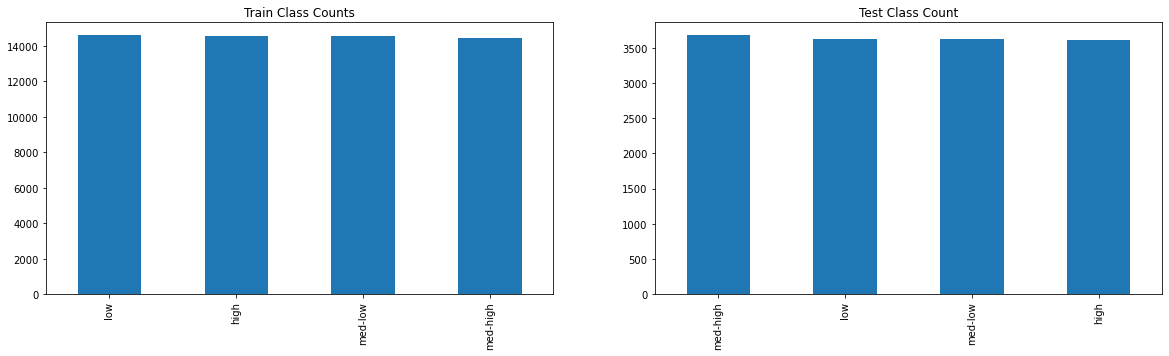

In [23]:
# One hot encoding from https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
X_one_hot_df = pd.concat([df,
                               pd.get_dummies(df['County'], prefix='one_County')],
                               axis=1)
X_one_hot_df.drop(['County'],axis=1, inplace=True)
X_one_hot_df = pd.concat([X_one_hot_df,
                           pd.get_dummies(X_one_hot_df['State'], prefix='one_State')],
                           axis=1)
X_one_hot_df.drop(['State'],axis=1, inplace=True)
print(len(X_one_hot_df[X_one_hot_df.TotalPop.isnull()]))

#Resplit the data.
df_y = df['child_poverty_class']

X_train_df, X_test_df, y_train_df, y_test_df = \
    train_test_split(X_one_hot_df, df_y, test_size=0.2)
print('Size of X Train', X_train_df.shape)
print('Size of X Test', len(X_test_df))
print('Size of y Train', len(y_train_df))
print('Size of y Test', len(y_test_df))

fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
X_train_df['child_poverty_class'].value_counts().plot(kind='bar')
plt.title('Train Class Counts')
plt.subplot(1,2,2)
X_test_df['child_poverty_class'].value_counts().plot(kind='bar')
plt.title('Test Class Count')

X_train_df = X_train_df.drop(columns=['child_poverty_class','ChildPoverty'])

X_test_df = X_test_df.drop(columns=['child_poverty_class','ChildPoverty'])

#Normalize the data Force the sum to be 1 of all of the features
X_train_df_norm = X_train_df.copy()
X_test_df_norm = X_test_df.copy()

for col in X_train_df.columns:
    if col[0:3] != 'one':
        X_train_df_norm[col] = X_train_df[col] / np.linalg.norm(X_train_df[col])
        X_test_df_norm[col] = X_test_df[col] / np.linalg.norm(X_train_df[col])
X_train_df_norm.head()


In [24]:
X_train_one_hot = X_train_df_norm.to_numpy()

code_classes = {"child_poverty_class": {'low':0, 'med-low':1, 'med-high':2, 'high':3}}
y_train_one_hot = y_train_df.to_frame().replace(code_classes).to_numpy().ravel()
X_test_one_hot = X_test_df_norm.to_numpy()
y_test_one_hot = y_test_df.to_frame().replace(code_classes).to_numpy().ravel()


In [25]:
%%time
from sklearn.metrics import accuracy_score
params = { 'n_hidden':20, 
         'C':0.1, 'epochs':400, 'eta':0.001, 
         'alpha':0.01, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}


nn_one_hot = TwoLayerPerceptron(**params)
nn_one_hot.fit(X_train_one_hot, y_train_one_hot, print_progress=1,XY_test=(X_test_one_hot,y_test_one_hot))
yhat_one_hot = nn_one_hot.predict(X_test_one_hot)
print('Test acc:',accuracy_score(y_test_one_hot,yhat_one_hot))

Epoch: 400/400

Test acc: 0.45702695269526955
Wall time: 13min 52s


0 3
0 3
0 3
Loss :
Resubstitution acc: 0.5095231546739093
Validation acc: 0.47586633663366334


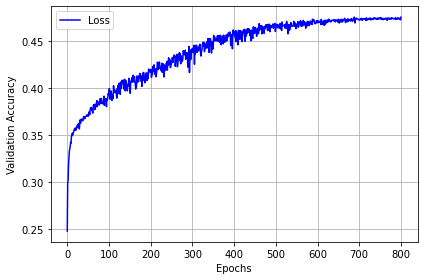

In [59]:
print(min(y_test_one_hot),max(y_test_one_hot))
print(min(yhat_one_hot),max(yhat_one_hot))
print(min(y_train_one_hot),max(y_train_one_hot))
print_result(nn_one_hot,X_train_one_hot,y_train_one_hot,X_test_one_hot,y_test_one_hot,title="Loss",color="blue")

plt.show()

In [27]:
%%time
from sklearn.metrics import accuracy_score
params = { 'n_hidden':20, 
         'C':0.1, 'epochs':800, 'eta':0.001, 
         'alpha':0.01, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn_one_hot = TwoLayerPerceptron(**params)
nn_one_hot.fit(X_train_one_hot, y_train_one_hot, print_progress=1,XY_test=(X_test_one_hot,y_test_one_hot))
yhat_one_hot = nn_one_hot.predict(X_test_one_hot)
print('Test acc:',accuracy_score(y_test_one_hot,yhat_one_hot))

Epoch: 800/800

Test acc: 0.47586633663366334
Wall time: 27min 28s


0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5095231546739093
Validation acc: 0.47586633663366334


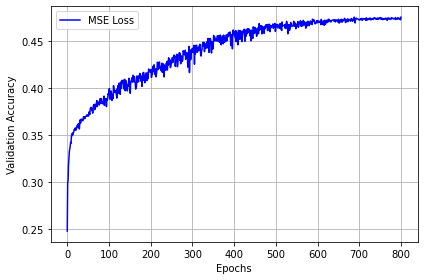

In [28]:
print(min(y_test_one_hot),max(y_test_one_hot))
print(min(yhat_one_hot),max(yhat_one_hot))
print(min(y_train_one_hot),max(y_train_one_hot))
print_result(nn_one_hot,X_train_one_hot,y_train_one_hot,X_test_one_hot,y_test_one_hot,title="Loss",color="blue")

plt.show()

## Compare Results for 2 Layer Perceptrons


From above we can find the following error rates for each model we trained above:
* Raw Data: $e_1 = .757$
* With Normilization $e_2 = .537$
* With One hot encoding and Normilization $e_3 = .524$

First it is obivious but if we show #$e_1$ and $e_2$ are statistically different then $e_2$ and $e_3$ are different we can assume they are all different (they all had the same sized data)

$$
\hat{\sigma}_1^2= \frac{.756601(1-.756601)}{58174} = .00000316561
$$

$$
\hat{\sigma}_2^2= \frac{.536579(1-.536579)}{58174} = .00000427445
$$

$$
\hat{\sigma}_3^2= \frac{.524134(1-.524134)}{58174} = .00000428744
$$


Compare $e_2$ and $e_3$
$$
d = |.524134-.536579| = 0.012445
$$

$$
\hat{\sigma}_t^2 = .00000427445 +00000428744 = .00000857489
$$

Using a confidance of 95% $Z_{\alpha/2} = \pm 1.96$
$$
d_t = 0.012445 \pm 1.96\times \sqrt{.00000857489} = 0.012445\pm.0067105
$$

Since this interval does not contain 0, we can say that these are different models, and have a good guess that the model with normilzation is better. The first model without normilization and one hot encoding is so much worse than the other two is is not worth performing this test. It is obviousily a different model since the datasets were the same size.

# Modeling
## 3 Layer


In [29]:
# Taken from the two layer perceptron
class ThreeLayerPerceptronBase(object):
    def __init__(self, n_hidden1=30, n_hidden2=30,
                 C=0.0, epochs=500, eta=0.001, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1,random_state=None):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.minibatches = minibatches
        self.shuffle = shuffle
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_ + 1))
        W1[:,:1] = 0
        init_bound = 4*np.sqrt(6. / (self.n_hidden2 + self.n_hidden1 + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1 + 1))
        W2[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden2 + 1))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden2 + 1))
        W3[:,:1] = 0
        
        return W1, W2, W3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2,W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2, W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2,W3)
        return cost + L2_term
    

In [104]:
class ThreeLayerPerceptron(ThreeLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, W3):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 


        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        #added code
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
    
        # vectorized backpropagation
        V3 = -2*(Y_enc-A4)*A4*(1-A4)
        grad3 = V3 @ A3.T
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        
        V2 = (A3*(1-A3)*((W3).T @ V3))
        grad2 = V2[1:,:] @ A2.T
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        
        V1 = A2*(1-A2)*((W2).T @ V2[1:,:])
        grad1 = V1[1:,:] @ A1.T
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        
        return grad1, grad2, grad3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)
        delta_W3_prev = np.zeros(self.W3.shape)

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        self.grad1s = []
        self.grad2s = []
        self.grad3s = []
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            grad1_avg = 0
            grad2_avg = 0
            grad3_avg = 0
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,self.W3)
                
                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3 = self._get_gradient(
                                         A1=A1, A2=A2, A3=A3, A4=A4,
                                         Z1=Z1, Z2=Z2, Z3=Z3,
                                         Y_enc=Y_enc[:, idx],
                                         W1=self.W1,W2=self.W2,W3=self.W3)
                grad1_avg += np.mean(np.abs(grad1))
                grad2_avg += np.mean(np.abs(grad2))
                grad3_avg += np.mean(np.abs(grad3))
                # momentum calculations
                delta_W1 = self.eta * grad1
                delta_W2 = self.eta * grad2
                delta_W3 = self.eta * grad3
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev))
                self.W3 -= (delta_W3 + (self.alpha * delta_W3_prev))
                delta_W1_prev = delta_W1
                delta_W2_prev = delta_W2
                delta_W3_prev = delta_W3
            
            
            grad1_avg /= self.minibatches
            grad2_avg /= self.minibatches
            grad3_avg /= self.minibatches
            self.grad1s.append(grad1_avg)
            self.grad2s.append(grad2_avg)
            self.grad3s.append(grad3_avg)
            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

In [105]:
X_train = X_train_df_norm.to_numpy()

code_classes = {"child_poverty_class": {'low':0, 'med-low':1, 'med-high':2, 'high':3}}
y_train = y_train_df.to_frame().replace(code_classes).to_numpy().ravel()
X_test = X_test_df_norm.to_numpy()
y_test = y_test_df.to_frame().replace(code_classes).to_numpy().ravel()
print(X_train.shape)

(58174, 2039)


Epoch: 20/20

Test acc: 0.3589108910891089
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.3712655138034173
Validation acc: 0.3589108910891089


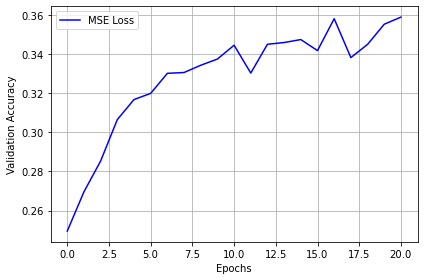

Wall time: 54 s


In [108]:
%%time
from sklearn.metrics import accuracy_score
params = { 'n_hidden1':25, 'n_hidden2':12,
         'C':0.01, 'epochs':800,'eta':0.001, 
         'alpha':0.1, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = ThreeLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="Loss",color="blue")

plt.show()

Text(0, 0.5, 'Grad 3 Magnitude')

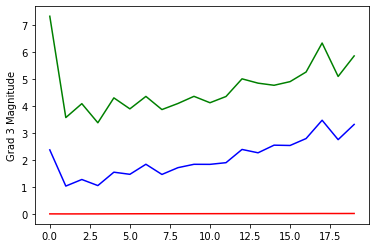

In [112]:
plt.plot(range(len(nn.grad1s)), nn.grad1s, color='red',label='grad 1')
plt.ylabel('Grad 1 Magnitude')
plt.plot(range(len(nn.grad1s)), nn.grad2s, color='blue',label='grad 1')
plt.ylabel('Grad 2 Magnitude')
plt.plot(range(len(nn.grad1s)), nn.grad3s, color='green',label='grad 1')
plt.ylabel('Grad 3 Magnitude')

In [89]:
a = np.asarray([[1,2,3],[4,5,6],[7,8,9]])
np.mean(a)

5.0

## N-Layer

In [34]:
# Taken from the two layer perceptron
class NLayerPerceptronBase(object):
    def __init__(self, hidden_layers=(100,100),
                 C=0.0, epochs=500, eta=0.001, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1,random_state=None):
        np.random.seed(random_state)
        self.hidden_layers = hidden_layers
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.minibatches = minibatches
        self.shuffle = shuffle
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        Ws = []
        init_bound = 4*np.sqrt(6. / (self.hidden_layers[0] + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.hidden_layers[0], self.n_features_ + 1))
        W1[:,:1] = 0
        Ws.append(W1)
        for i in range(1,len(self.hidden_layers)):
            init_bound = 4*np.sqrt(6. / (self.hidden_layers[i] + self.hidden_layers[i-1] + 1))
            W_i = np.random.uniform(-init_bound, init_bound,(self.hidden_layers[i], self.hidden_layers[i-1] + 1))
            W_i[:,:1] = 0
            Ws.append(W_i)
            
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.hidden_layers[-1] + 1))
        W_n = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.hidden_layers[-1] + 1))
        W_n[:,:1] = 0
        Ws.append(W_n)
        return Ws
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, Ws):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        mean_sqaure_sum = 0
        for W in Ws:
            mean_sqaure_sum += np.mean(W[:,1:] ** 2)
            
        return (lambda_/2.0) * np.sqrt(mean_sqaure_sum)
    
    def _cost(self,A_n,Y_enc, Ws):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A_n)**2)
        L2_term = self._L2_reg(self.l2_C, Ws)
        return cost + L2_term
    

In [113]:
class NLayerPerceptron(NLayerPerceptronBase):
    def _feedforward(self, X, Ws):
        """Compute feedforward step"""
        As = []
        
        A1 = X.T
        As.append(A1)
        
        Zs = []
        for W in Ws:
            As[-1] = self._add_bias_unit(As[-1], how='row')
            Zs.append(W @ As[-1])
            As.append(self._sigmoid(Zs[-1]))
        
        
        return As, Zs
    
    def _get_gradient(self, As, Zs, Y_enc, Ws):
        """ Compute gradient step using backpropagation.
        """
        grads = []
        
        # vectorized backpropagation
        V_N = -2*(Y_enc-As[-1])*As[-1]*(1-As[-1])
        grad_N = V_N @ As[-2].T
        grad_N[:, 1:] += Ws[-1][:, 1:] * self.l2_C
        grads.append(grad_N)
        
        V_N_1 = As[-2]*(1-As[-2])*((Ws[-1].T) @ V_N)
        grad_N_1 = V_N_1[1:,:] @ As[-3].T
        grad_N_1[:, 1:] += Ws[-2][:, 1:] * self.l2_C
        grads.append(grad_N_1)
        
        V_last = V_N_1
        # Loop from the Third to last W, to the begining of the list of Ws
        for n in range(len(Ws)-3, -1, -1):
            temp1 = As[n+1]*(1 - As[n+1])
            temp2 = (Ws[n+1].T @ V_last[1:,:])
            V_n = As[n+1]*(1 - As[n+1])*(Ws[n+1].T @ V_last[1:,:])
            grad_n = V_n[1:,:] @ As[n].T
            grad_n[:, 1:] += Ws[n][:, 1:] * self.l2_C
            grads.append(grad_n)
            V_last = V_n
            
        grads.reverse()
        
        return grads
    
    def predict(self, X):
        """Predict class labels"""
        Zs, As = self._feedforward(X, self.Ws)
        y_pred = np.argmax(As[-1], axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()

        deltas_prev = []
        for W in self.Ws:
            delta_n = np.zeros(W.shape)
            deltas_prev.append(delta_n)

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        
        
        self.grad_mags = []
        for k in range(len(self.hidden_layers) + 1):
            self.grad_mags.append([])
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            for grad_mag in self.grad_mags:
                grad_mag.append(0)
            for idx in mini:

                # feedforward
                As, Zs = self._feedforward(X_data[idx], self.Ws)
                
                cost = self._cost(As[-1],Y_enc[:, idx],self.Ws)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grads = self._get_gradient(As=As, Ws=self.Ws, Zs=Zs,Y_enc=Y_enc[:, idx])
                for grad,grad_mag  in zip(grads,self.grad_mags):
                    grad_mag[-1] += np.mean(np.abs(grad))
                    
                # momentum calculations
                for W, grad, i in zip(self.Ws, grads,range(0,len(self.Ws))):
                    delta = self.eta * grad
                    self.Ws[i] -= (delta + (self.alpha*deltas_prev[i]))
                    deltas_prev[i] = delta
                    
            for grad_mag  in self.grad_mags:
                grad_mag[-1] /= self.minibatches
            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

## 4 Layer

In [38]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25),
         'C':0.1, 'epochs':1000,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = NLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=10,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 1000/1000

Test acc: 0.548473597359736
Wall time: 54min 44s


Text(0, 0.5, 'Grad 4 Magnitude')

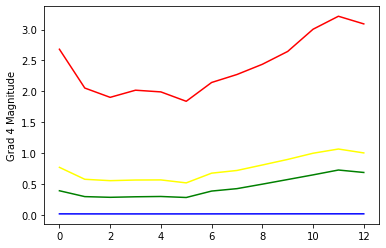

In [124]:
plt.plot(range(len(nn.grad_mags[0])), nn.grad_mags[0], color='blue',label='grad 1')
plt.ylabel('Grad 1 Magnitude')
plt.plot(range(len(nn.grad_mags[1])), nn.grad_mags[1], color='green',label='grad 2')
plt.ylabel('Grad 2 Magnitude')
plt.plot(range(len(nn.grad_mags[2])), nn.grad_mags[2], color='yellow',label='grad 3')
plt.ylabel('Grad 3 Magnitude')
plt.plot(range(len(nn.grad_mags[3])), nn.grad_mags[3], color='red',label='grad 4')
plt.ylabel('Grad 4 Magnitude')

0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5798982363255062
Validation acc: 0.548473597359736


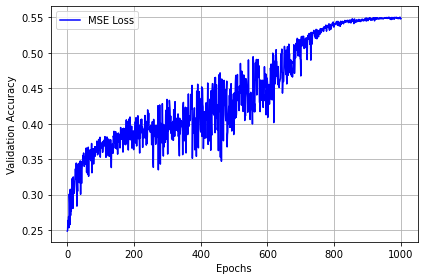

In [39]:
print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="Loss",color="blue")

plt.show()

## 5 Layer

In [40]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25,10),
         'C':0.1, 'epochs':1000,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = NLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=10,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 1000/1000

Test acc: 0.558993399339934
Wall time: 54min 20s


In [ ]:
plt.plot(range(len(nn.grad_mags[0])), nn.grad_mags[0], color='blue',label='grad 1')
plt.ylabel('Grad 1 Magnitude')
plt.plot(range(len(nn.grad_mags[1])), nn.grad_mags[1], color='green',label='grad 2')
plt.ylabel('Grad 2 Magnitude')
plt.plot(range(len(nn.grad_mags[2])), nn.grad_mags[2], color='yellow',label='grad 3')
plt.ylabel('Grad 3 Magnitude')
plt.plot(range(len(nn.grad_mags[3])), nn.grad_mags[3], color='red',label='grad 4')
plt.ylabel('Grad 4 Magnitude')
plt.plot(range(len(nn.grad_mags[4])), nn.grad_mags[4], color='purple',label='grad 5')
plt.ylabel('Grad 5 Magnitude')

0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5916388764740262
Validation acc: 0.558993399339934


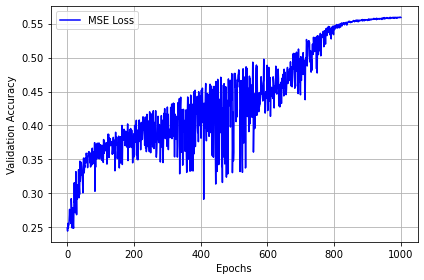

In [41]:
print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="Loss",color="blue")

plt.show()

## 5 Layer Adaptive Learning with AdaGrad

In [125]:
class NLayerPerceptronAdaGrad(NLayerPerceptron):
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()

        deltas_prev = []
        for W in self.Ws:
            delta_n = np.zeros(W.shape)
            deltas_prev.append(delta_n)
        
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        
        # init the Adda grad values to 0
        Gs_prev = []
        for W in self.Ws:
            G = np.zeros(W.shape)
            Gs_prev.append(G)
            
        self.grad_mags = []
        for k in range(len(self.hidden_layers) + 1):
            self.grad_mags.append([])    
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            for grad_mag in self.grad_mags:
                grad_mag.append(0)
            for idx in mini:

                # feedforward
                As, Zs = self._feedforward(X_data[idx], self.Ws)
                
                cost = self._cost(As[-1],Y_enc[:, idx],self.Ws)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grads = self._get_gradient(As=As, Ws=self.Ws, Zs=Zs,Y_enc=Y_enc[:, idx])
                
                Gs = []
                for grad, i in zip(grads, range(0,len(grads))):
                    Gs.append(Gs_prev[i] + grad*grad)
                for grad,grad_mag  in zip(grads,self.grad_mags):
                    grad_mag[-1] += np.mean(np.abs(grad))
                
                for W, grad, i in zip(self.Ws, grads,range(0,len(self.Ws))):
                    rho = self.eta / np.sqrt((Gs[i]+0.0001))*grad
                    self.Ws[i] -= rho
            for grad_mag  in self.grad_mags:
                grad_mag[-1] /= self.minibatches    
            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

Epoch: 10/10

Test acc: 0.42574257425742573
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.44035135971396155
Validation acc: 0.42574257425742573


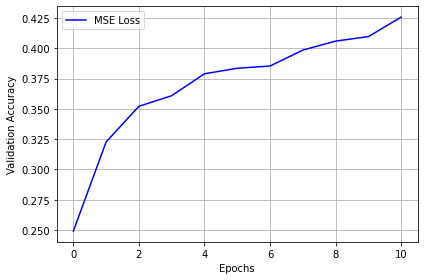

Wall time: 50.8 s


In [126]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25,10),
         'C':0.01, 'epochs':1500,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':200,
         'shuffle':True,'random_state':1}

nn = NLayerPerceptronAdaGrad(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="Loss",color="blue")

plt.show()

Text(0, 0.5, 'Grad 5 Magnitude')

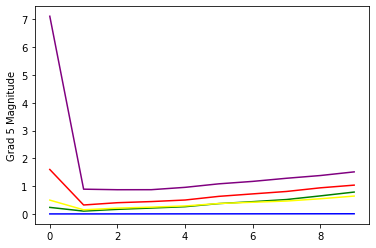

In [127]:
plt.plot(range(len(nn.grad_mags[0])), nn.grad_mags[0], color='blue',label='grad 1')
plt.ylabel('Grad 1 Magnitude')
plt.plot(range(len(nn.grad_mags[1])), nn.grad_mags[1], color='green',label='grad 2')
plt.ylabel('Grad 2 Magnitude')
plt.plot(range(len(nn.grad_mags[2])), nn.grad_mags[2], color='yellow',label='grad 3')
plt.ylabel('Grad 3 Magnitude')
plt.plot(range(len(nn.grad_mags[3])), nn.grad_mags[3], color='red',label='grad 4')
plt.ylabel('Grad 4 Magnitude')
plt.plot(range(len(nn.grad_mags[4])), nn.grad_mags[4], color='purple',label='grad 5')
plt.ylabel('Grad 5 Magnitude')

### Compared to Five Layer Perceptron

From above we can find the following error rates for each model we trained above:
* 5 layer: $e_1 = 0.441066$
* 5 layer with AdaGrad $e_2 = *****$

First it is obivious but if we show #$e_1$ and $e_2$ are statistically different then $e_2$ and $e_3$ are different we can assume they are all different (they all had the same sized data)

$$
\hat{\sigma}_1^2= \frac{.441066(1-.441066)}{58174} = .00000423774
$$

$$
\hat{\sigma}_2^2= \frac{a(1-a)}{58174} = 
$$


Compare $e_1$ and $e_2$
$$
d = |.441066-.b| = c
$$

$$
\hat{\sigma}_t^2 = .00000423774 + b = d
$$

Using a confidance of 95% $Z_{\alpha/2} = \pm 1.96$
$$
d_t = c \pm 1.96\times \sqrt{d} = e\pm.f
$$

Since this interval does not contain 0, we can say that these are different models, and have a good guess that the model with normilzation is better. The first model without normilization and one hot encoding is so much worse than the other two is is not worth performing this test. It is obviousily a different model since the datasets were the same size.

## 5 Layer AdaM

In [53]:
class NLayerPerceptronAdam(NLayerPerceptron):
    def __init__(self, beta_1, beta_2, **params):
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        super().__init__(**params)
        
        
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()

        deltas_prev = []
        for W in self.Ws:
            delta_n = np.zeros(W.shape)
            deltas_prev.append(delta_n)
        
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        
        # init the Adda grad values to 0
        Mk_prev = []
        Vk_prev = []
        for W in self.Ws:
            M = np.zeros(W.shape)
            Mk_prev.append(M)
            V = np.zeros(W.shape)
            Vk_prev.append(V)
        
        
        for k in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*k)

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                As, Zs = self._feedforward(X_data[idx], self.Ws)
                
                cost = self._cost(As[-1],Y_enc[:, idx],self.Ws)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grads = self._get_gradient(As=As, Ws=self.Ws, Zs=Zs,Y_enc=Y_enc[:, idx])
                
                M_k = []
                V_k = []
                for grad, i in zip(grads, range(0,len(grads))):
                    M_k.append(self.beta_1 * Mk_prev[i] + (1-self.beta_1) * grads[i])
                    V_k.append(self.beta_2 * Vk_prev[i] + ((1-self.beta_2) *(grads[i]*grads[i])))
                    
                for W, grad, M, V, i in zip(self.Ws, grads, M_k, V_k, range(0,len(self.Ws))):
                    # boost momentums
                    M_k_hat = M / (1-np.power(self.beta_1,k+1))
                    V_k_hat = V / (1-np.power(self.beta_2,k+1))
                    ##update radient
                    self.Ws[i] -= self.eta*(M_k_hat/np.sqrt(V_k_hat + 1e-4))                 
                
            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

Epoch: 1200/1200

Test acc: 0.6426017601760176
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.699436174235913
Validation acc: 0.6426017601760176


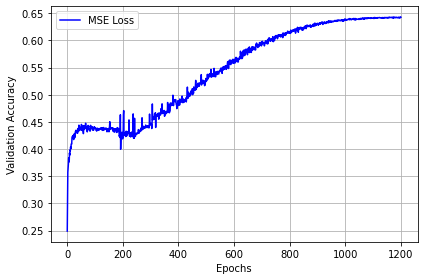

Wall time: 1h 11min 42s


In [54]:
%%time
from sklearn.metrics import accuracy_score
params = { 'beta_1':0.9, 'beta_2':0.999,
          'hidden_layers':(100,50,25,10), 
         'C':0.01, 'epochs':1500,'eta':0.005, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn = NLayerPerceptronAdam(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="Loss",color="blue")

plt.show()

In [ ]:
plt.plot(range(len(nn.grad_mags[0])), nn.grad_mags[0], color='blue',label='grad 1')
plt.ylabel('Grad 1 Magnitude')
plt.plot(range(len(nn.grad_mags[1])), nn.grad_mags[1], color='green',label='grad 2')
plt.ylabel('Grad 2 Magnitude')
plt.plot(range(len(nn.grad_mags[2])), nn.grad_mags[2], color='yellow',label='grad 3')
plt.ylabel('Grad 3 Magnitude')
plt.plot(range(len(nn.grad_mags[3])), nn.grad_mags[3], color='red',label='grad 4')
plt.ylabel('Grad 4 Magnitude')
plt.plot(range(len(nn.grad_mags[4])), nn.grad_mags[4], color='purple',label='grad 5')
plt.ylabel('Grad 5 Magnitude')

Compare to 5 layer 

From above we can find the following error rates for each model we trained above:
* 5 layer: $e_1 = 0.441066$
* 5 layer with AdaM $e_2 = .357398$

First it is obivious but if we show #$e_1$ and $e_2$ are statistically different then $e_2$ and $e_3$ are different we can assume they are all different (they all had the same sized data)

$$
\hat{\sigma}_1^2= \frac{.441066(1-.441066)}{58174} = .00000423774
$$

$$
\hat{\sigma}_2^2= \frac{.357398(1-.357398)}{58174} = .00000394789
$$


Compare $e_1$ and $e_2$
$$
d = |.441066-.357398| = .083668
$$

$$
\hat{\sigma}_t^2 = .00000423774 + 00000394789 = .00000818563
$$

Using a confidance of 95% $Z_{\alpha/2} = \pm 1.96$
$$
d_t = .083668 \pm 1.96\times \sqrt{.00000818563} = .083668\pm.005607
$$

Since the final ragne does not include 0, we can conclude with a 95% confidence that the AdaM will perform better than the normal 5 layer perceptron